In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [40]:
df=pd.read_csv(r"E:\github\data science\data-science\Machine Learning\Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [42]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [43]:
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 0


In [44]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [45]:
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df = df.drop('CustomerID', axis=1)

In [46]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
features = ['Age','Annual Income','Spending Score']
X_scaled = scaler.fit_transform(df[features])

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
km=KMeans(n_clusters=6,random_state=42)
lb.fit(df['Gender'])
df['Gender']=lb.transform(df['Gender'])

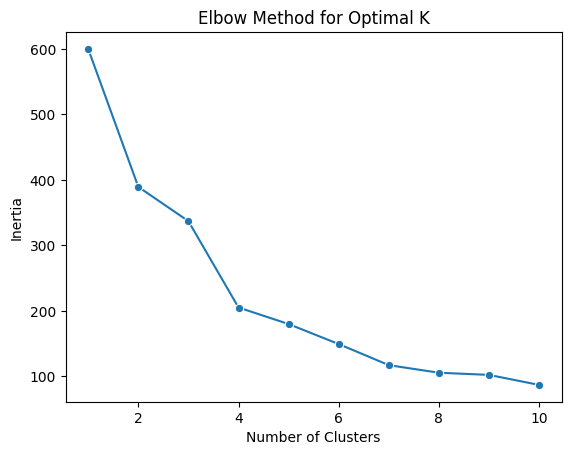

In [48]:
elbow = []
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X_scaled)
    elbow.append(km.inertia_)
sns.lineplot(x=range(1, 11), y=elbow, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [49]:
km.fit_predict(X_scaled)
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, km.labels_)
print("Silhouette Score:", score)



Silhouette Score: 0.4051295191295275


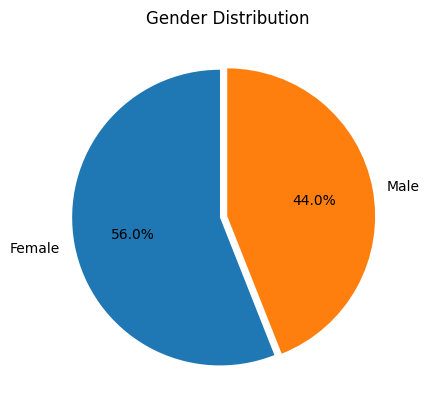

In [50]:
values = df['Gender'].value_counts().sort_index()
labels = ['Female', 'Male']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.05,0))
plt.title('Gender Distribution')
plt.show()

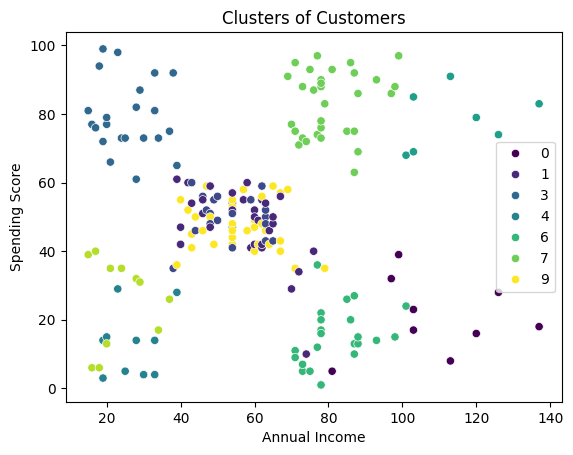

In [51]:
sns.scatterplot(x='Annual Income', y='Spending Score', hue=km.labels_, data=df, palette='viridis')
plt.title('Clusters of Customers')
plt.show()